In [2]:
import numpy as np

### TILE SPLITS

In [3]:
t = 8       #8x8 tiles
nw = (2,2)  #num windows (xy)
ws = (3,2)  #size of windows (wh)
a = np.arange(np.prod(nw)*np.prod(ws)*(t**2)).reshape(nw[1]*ws[1]*t,nw[0]*ws[0]*t)
print(a.shape)
print(a[0])

(32, 48)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


In [4]:
#view a single tile
a[:t,:t]

array([[  0,   1,   2,   3,   4,   5,   6,   7],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 96,  97,  98,  99, 100, 101, 102, 103],
       [144, 145, 146, 147, 148, 149, 150, 151],
       [192, 193, 194, 195, 196, 197, 198, 199],
       [240, 241, 242, 243, 244, 245, 246, 247],
       [288, 289, 290, 291, 292, 293, 294, 295],
       [336, 337, 338, 339, 340, 341, 342, 343]])

In [5]:
#make windows
b = []
for y in range(nw[1]):
    for x in range(nw[0]):
        window = []
        ox = x*(t*ws[0])
        oy = y*(t*ws[1])
        for h in range(ws[1]):
            for w in range(ws[0]):
                tile = (a[(oy+h*t):(oy+t*(h+1)),(ox+w*t):(ox+t*(w+1))])
                window.append(tile)
        b.append(window)
 
b = np.array(b).reshape(np.prod(nw),ws[1],ws[0],t,t)
print(b.shape)
print(b)

(4, 2, 3, 8, 8)
[[[[[   0    1    2 ...    5    6    7]
    [  48   49   50 ...   53   54   55]
    [  96   97   98 ...  101  102  103]
    ...
    [ 240  241  242 ...  245  246  247]
    [ 288  289  290 ...  293  294  295]
    [ 336  337  338 ...  341  342  343]]

   [[   8    9   10 ...   13   14   15]
    [  56   57   58 ...   61   62   63]
    [ 104  105  106 ...  109  110  111]
    ...
    [ 248  249  250 ...  253  254  255]
    [ 296  297  298 ...  301  302  303]
    [ 344  345  346 ...  349  350  351]]

   [[  16   17   18 ...   21   22   23]
    [  64   65   66 ...   69   70   71]
    [ 112  113  114 ...  117  118  119]
    ...
    [ 256  257  258 ...  261  262  263]
    [ 304  305  306 ...  309  310  311]
    [ 352  353  354 ...  357  358  359]]]


  [[[ 384  385  386 ...  389  390  391]
    [ 432  433  434 ...  437  438  439]
    [ 480  481  482 ...  485  486  487]
    ...
    [ 624  625  626 ...  629  630  631]
    [ 672  673  674 ...  677  678  679]
    [ 720  721  722 ... 

In [19]:
e = b[0][0][0][:,:4]
f = b[0][1][0][:,:4]
q = b[1][0][0][:,:4]
r = e[:]
g = np.hstack((r,f))
g = np.hstack((g,q))
g = np.vstack((g,g))
print(g)

[[  0   1   2   3 384 385 386 387  24  25  26  27]
 [ 48  49  50  51 432 433 434 435  72  73  74  75]
 [ 96  97  98  99 480 481 482 483 120 121 122 123]
 [144 145 146 147 528 529 530 531 168 169 170 171]
 [192 193 194 195 576 577 578 579 216 217 218 219]
 [240 241 242 243 624 625 626 627 264 265 266 267]
 [288 289 290 291 672 673 674 675 312 313 314 315]
 [336 337 338 339 720 721 722 723 360 361 362 363]
 [  0   1   2   3 384 385 386 387  24  25  26  27]
 [ 48  49  50  51 432 433 434 435  72  73  74  75]
 [ 96  97  98  99 480 481 482 483 120 121 122 123]
 [144 145 146 147 528 529 530 531 168 169 170 171]
 [192 193 194 195 576 577 578 579 216 217 218 219]
 [240 241 242 243 624 625 626 627 264 265 266 267]
 [288 289 290 291 672 673 674 675 312 313 314 315]
 [336 337 338 339 720 721 722 723 360 361 362 363]]


In [12]:
tileset = list(range(10))
a = np.random.choice(tileset,np.prod(nw)*np.prod(ws)).reshape(nw[1]*ws[1],nw[0]*ws[0])
print(a)
print(a.shape)

[[7 0 2 6 8 9]
 [8 7 7 1 4 0]
 [6 2 9 9 9 8]
 [9 8 6 4 4 9]]
(4, 6)


In [14]:
#make windows
b = []
for y in range(nw[1]):
    for x in range(nw[0]):
        window = []
        ox = x*(ws[0])
        oy = y*(ws[1])
        for h in range(ws[1]):
            for w in range(ws[0]):
                tile = (a[(oy+h):(oy+(h+1)),(ox+w):(ox+(w+1))])
                window.append(tile)
        b.append(window)
 
b = np.array(b).reshape(np.prod(nw),ws[1],ws[0])
print(b.shape)
print(b)

(4, 2, 3)
[[[7 0 2]
  [8 7 7]]

 [[6 8 9]
  [1 4 0]]

 [[6 2 9]
  [9 8 6]]

 [[9 9 8]
  [4 4 9]]]


In [71]:
#BORDER
barr = np.array([['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
         ['x','1','_','_','_','_','1','x','2','_','_','_','_','2','x'],
         ['x','_','_','_','_','_','_','x','_','_','_','_','_','_','x'],
         ['x','1','_','_','_','_','1','x','2','_','_','_','_','2','x'],
         ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
         ['x','3','_','_','_','_','3','x','4','_','_','_','_','4','x'],
         ['x','_','_','_','_','_','_','x','_','_','_','_','_','_','x'],
         ['x','3','_','_','_','_','3','x','4','_','_','_','_','4','x'],
         ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x']])

ws = (6,3)
err = barr[:]
bord = 1

In [74]:
hbor = list(range(0,barr.shape[0],ws[1]+bord))
vbor = list(range(0,barr.shape[1],ws[0]+bord))
print(hbor)
print(vbor)

[0, 4, 8]
[0, 7, 14]


In [73]:
err = np.delete(err, hbor, axis=0)
err = np.delete(err, vbor, axis=1)
print(err)

[['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']]


In [88]:
barr2 = np.array([['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','1','_','_','_','_','1','x','x','2','_','_','_','_','2','x','x'],
                  ['x','x','_','_','_','_','_','_','x','x','_','_','_','_','_','_','x','x'],
                  ['x','x','1','_','_','_','_','1','x','x','2','_','_','_','_','2','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','3','_','_','_','_','3','x','x','4','_','_','_','_','4','x','x'],
                  ['x','x','_','_','_','_','_','_','x','x','_','_','_','_','_','_','x','x'],
                  ['x','x','3','_','_','_','_','3','x','x','4','_','_','_','_','4','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                  ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x']])
ws = (6,3)
err2 = barr2[:]
bord = 2

hbor = []
for b in range(bord):
    hbor += list(range(b,barr2.shape[0],ws[1]+bord))
vbor = []
for b in range(bord):
    vbor += list(range(b,barr2.shape[1],ws[0]+bord))
print(hbor)
print(vbor)

[0, 5, 10, 1, 6, 11]
[0, 8, 16, 1, 9, 17]


In [89]:
err2 = np.delete(err2, hbor, axis=0)
err2 = np.delete(err2, vbor, axis=1)
print(err2)

[['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['1' '_' '_' '_' '_' '1' '2' '_' '_' '_' '_' '2']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']
 ['_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_' '_']
 ['3' '_' '_' '_' '_' '3' '4' '_' '_' '_' '_' '4']]


In [99]:
err3 = barr2[:]
for f in vbor:
    err3[:,f] = 'o'
for h in hbor:
    err3[h,:] = 'o'
print(err3)

[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' '1' '_' '_' '_' '_' '1' 'o' 'o' '2' '_' '_' '_' '_' '2' 'o' 'o']
 ['o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o']
 ['o' 'o' '1' '_' '_' '_' '_' '1' 'o' 'o' '2' '_' '_' '_' '_' '2' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' '3' '_' '_' '_' '_' '3' 'o' 'o' '4' '_' '_' '_' '_' '4' 'o' 'o']
 ['o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o' '_' '_' '_' '_' '_' '_' 'o' 'o']
 ['o' 'o' '3' '_' '_' '_' '_' '3' 'o' 'o' '4' '_' '_' '_' '_' '4' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']]


### CLUSTERING

In [219]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

#convert hex string tile to 2d color based tile
def tile2Color(t_str,tsize):
    t = []
    i = 0
    tt = t_str.split(",")
    for x in range(tsize):
        tx = []
        for y in range(tsize):
            tx.append(int(tt[i],16))		#convert from hex based to decimal int based
            i+=1
        t.append(tx)
    return np.array(t,dtype='uint8')		#original format of tile

#shows the members of the cluster
def showCluster(c):
    n = len(c)
    s = int(math.sqrt(n))
    w = math.ceil(n/s)
    plt.figure(figsize=(s,w))
    for i in range(n):
        plt.subplot(s,w,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(tile2Color(c[i],16).squeeze(),cmap='gray')
    plt.show()

In [214]:
#import tileset
from scripts.tile_map_maker import TileMapMaker

#get tileset and windows from tile map maker
TMM = TileMapMaker('maps/links_awakening.png')
window_size = (10,9)
ts = TMM.importTileSet()
wm = TMM.importWindows()

In [215]:
# EXPERIMENT 1 - cluster by same tile proximity

dirs = ['n','s','e','w']
d_map = {'n':(-1,0),'s':(1,0),'w':(0,-1),'e':(0,1)}

#return coordinates of a specific tile in a window map
def tileCoords(t,m):
    s = np.where(m == t)
    l = list(zip(s[0],s[1]))
    return l

#calculate the percentage of a tile that are the same as it in a given adjacent direction
def sameTilePerc(t,d,windows):
    m = windows.reshape(np.prod(wm.shape[:2]),wm.shape[2],wm.shape[3])
    total_tiles = 0
    perc_amt = 0
    
    #iterate through every window
    for w in m:
        coords = tileCoords(t, w)
        
        #no tiles here
        n = len(coords)
        if n == 0:
            continue
        
        #get directional position of tile
        coords_alt = list(map(lambda x: tuple(np.add(x,d_map[d])), coords))  
        
        #count up same tiles in the adjacent direction
        p = 0
        for c in coords_alt:
            if c in coords:
                p += 1
        
        total_tiles += n
        perc_amt += p
        
    if total_tiles > 0: 
        return round(perc_amt/total_tiles,7)
    return 0

#get all tile percentages
def allTilePerc(tset,w):
    atd = {}
    
    #get all tiles adjacent percentages
    for t in tset:
        td = {}
        for d in dirs:
            td[d] = sameTilePerc(t,d,w)
        atd[t] = td
    return atd
        

In [216]:
tiles = list(map(lambda x: str(x), ts.keys()))
tile_percentages = allTilePerc(tiles, wm)
for k,v in tile_percentages.items():
    print(str(k) + ":" + str(v))

0:{'n': 0.5323264, 's': 0.5323264, 'e': 0.5771065, 'w': 0.5771065}
1:{'n': 0.6270317, 's': 0.6270317, 'e': 0.609923, 'w': 0.609923}
2:{'n': 0.4584838, 's': 0.4584838, 'e': 0.5857401, 'w': 0.5857401}
3:{'n': 0.3541867, 's': 0.3541867, 'e': 0.6833494, 'w': 0.6833494}
4:{'n': 0.4372385, 's': 0.4372385, 'e': 0.5094142, 'w': 0.5094142}
5:{'n': 0.0052288, 's': 0.0052288, 'e': 0.6575163, 'w': 0.6575163}
6:{'n': 0.6447368, 's': 0.6447368, 'e': 0.731203, 'w': 0.731203}
7:{'n': 0.654649, 's': 0.654649, 'e': 0.0, 'w': 0.0}
8:{'n': 0.6673114, 's': 0.6673114, 'e': 0.0212766, 'w': 0.0212766}
9:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
10:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
11:{'n': 0.0, 's': 0.0, 'e': 0.6943765, 'w': 0.6943765}
12:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
13:{'n': 0.0, 's': 0.0, 'e': 0.0, 'w': 0.0}
14:{'n': 0.4468085, 's': 0.4468085, 'e': 0.4787234, 'w': 0.4787234}
15:{'n': 0.4363057, 's': 0.4363057, 'e': 0.7388535, 'w': 0.7388535}
16:{'n': 0.5432526, 's': 0.5432526, 'e': 0.59169

In [217]:
# K means clustering
from sklearn.cluster import KMeans
k = 7

#convert dictionary directional percentages to list in consistent format
data = []
for t in tiles:
    l = []
    for i in dirs:
        l.append(tile_percentages[t][i])
    data.append(l)
data = np.array(data)

clusters = KMeans(n_clusters=k).fit(data)
print(clusters.labels_)

[1 1 1 1 1 2 1 4 4 0 0 2 0 0 1 1 1 1 0 0 0 3 1 6 2 6 6 0 0 1 1 5 0 0 0 0 6
 0 2 1 0 1 5 6 0 4 0 2 4 4 0 1 0 0 2 0 6 0 2 2 5 0 1 2 2 0 0 2 0 0 0 3 5 0
 6 0 0 6 2 0 0 2 1 2 0 0 0 1 3 0 0 0 0 2 0 6 3 6 0 0 4 0 0 0 0 0 0 0 5 3 0
 6 0 0 0 3 0 0 0 1 0 0 1 3 0 1 1 2 2 0 0 0 0 1 1 0 0 0 0 4 3 0 0 3 3 0 2 4
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0
 0 4 0 0 0 0 0 0 0 0 0]


CLUSTER: 0


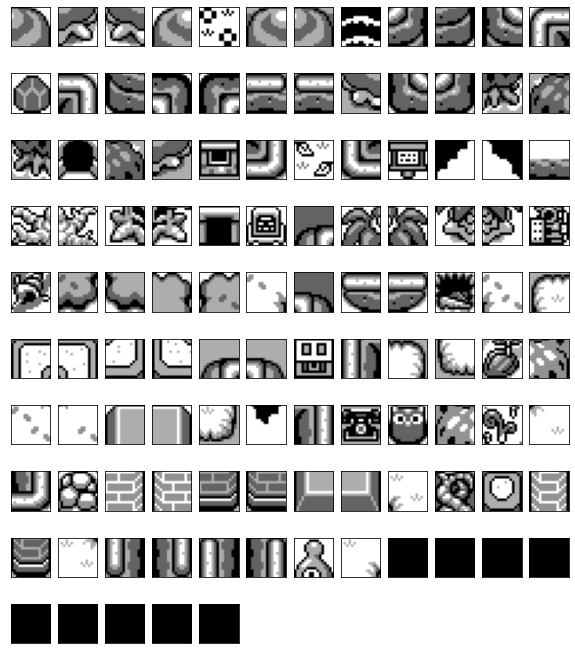

CLUSTER: 1


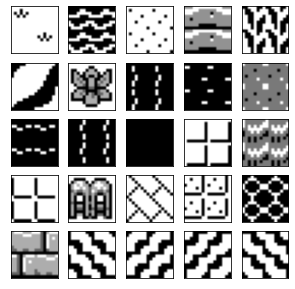

CLUSTER: 2


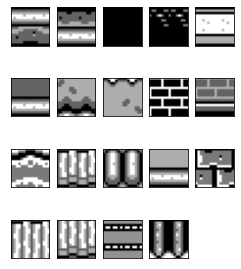

CLUSTER: 3


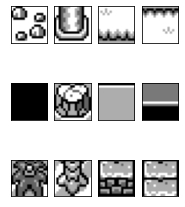

CLUSTER: 4


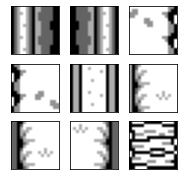

CLUSTER: 5


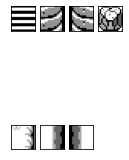

CLUSTER: 6


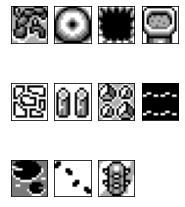

In [220]:
#show the clusters
for i in range(k):
    #get the tiles in a group
    ind = np.squeeze(np.where(clusters.labels_ == i))
    #print(ind)
    c = []
    for t in ind:
        c.append(ts[t])
        
        
    print("CLUSTER: " + str(i))
    showCluster(np.array(c))